In [1]:
#instalacion de paquetes


In [2]:
library(readr)
library(readxl)
library(olsrr)
library(dplyr)
#library(mtcars)
library(ggplot2)
library(MASS)


Attaching package: 'olsrr'


The following object is masked from 'package:datasets':

    rivers



Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Attaching package: 'MASS'


The following object is masked from 'package:dplyr':

    select


The following object is masked from 'package:olsrr':

    cement




In [3]:
InsData <- read.csv("C:/Users/gusta/JupyterLab/Econometria/DataBase INSURANCE/Insurance_EDITADO")
InsData <- InsData[,c(2,3,4,5,6,7,8,9)]

In [4]:
head(InsData)

,charges,age,sex,bmi,bmiSQ,children,smoker,region
,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>
1,16884.924,19,1,27.900,778.4100,0,1,0
2,1725.552,18,0,33.770,1140.4129,1,0,1
3,4449.462,28,0,33.000,1089.0000,3,0,1
4,21984.471,33,0,22.705,515.5170,0,0,2
5,3866.855,32,0,28.880,834.0544,0,0,2
6,3756.622,31,1,25.740,662.5476,0,0,1


## Realizamos analisis exploratorio ploteando histogramas y boxplot

In [5]:
#histout=apply(InsData,2,hist)
pdf("histCharge.pdf")
hist_charge <- hist(InsData$charges, main="Costos de primas de seguro",
        xlab="Costo de la prima",
        prob = TRUE)
lines(density(InsData$charges))
dev.off()

png 
  2

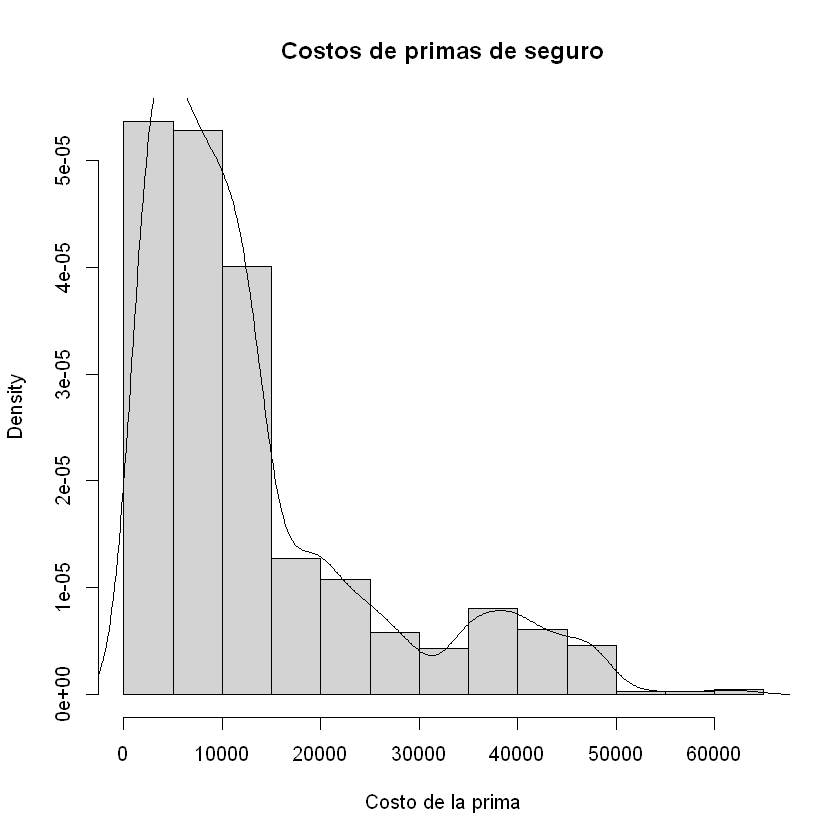

In [5]:
hist_charge <- hist(InsData$charges, main="Costos de primas de seguro",
        xlab="Costo de la prima",
        prob = TRUE)
lines(density(InsData$charges))

png 
  2

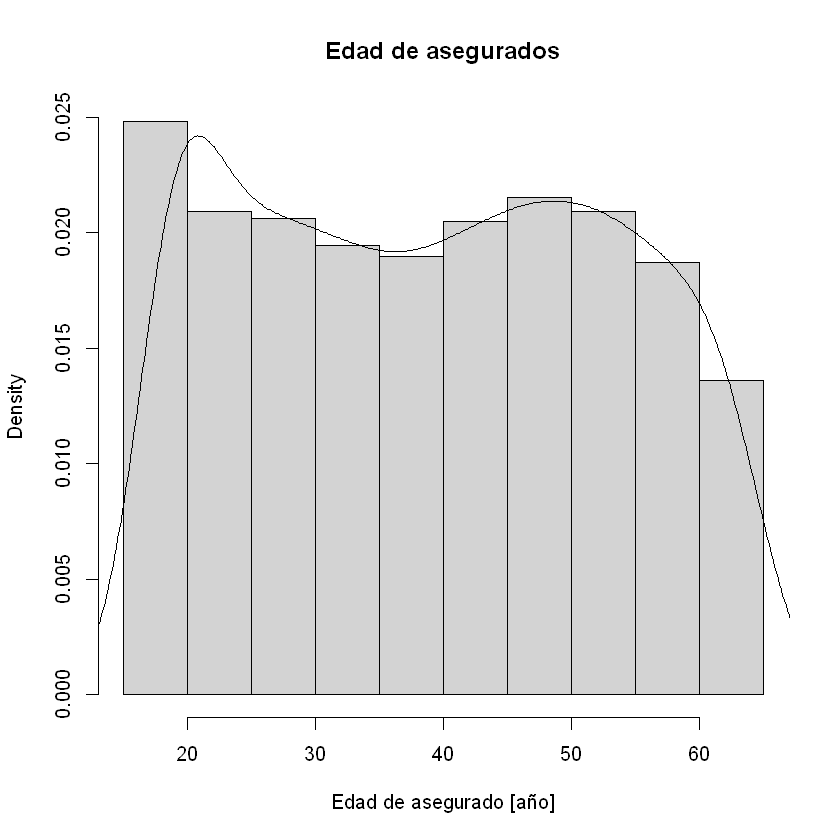

In [6]:
pdf("histEdad.pdf")
hist_age <- hist(InsData$age, main="Edad de asegurados",
        xlab="Edad de asegurado [año]",
        prob = TRUE)
lines(density(InsData$age))
dev.off()
hist_age <- hist(InsData$age, main="Edad de asegurados",
        xlab="Edad de asegurado [año]",
        prob = TRUE)
lines(density(InsData$age))

png 
  2

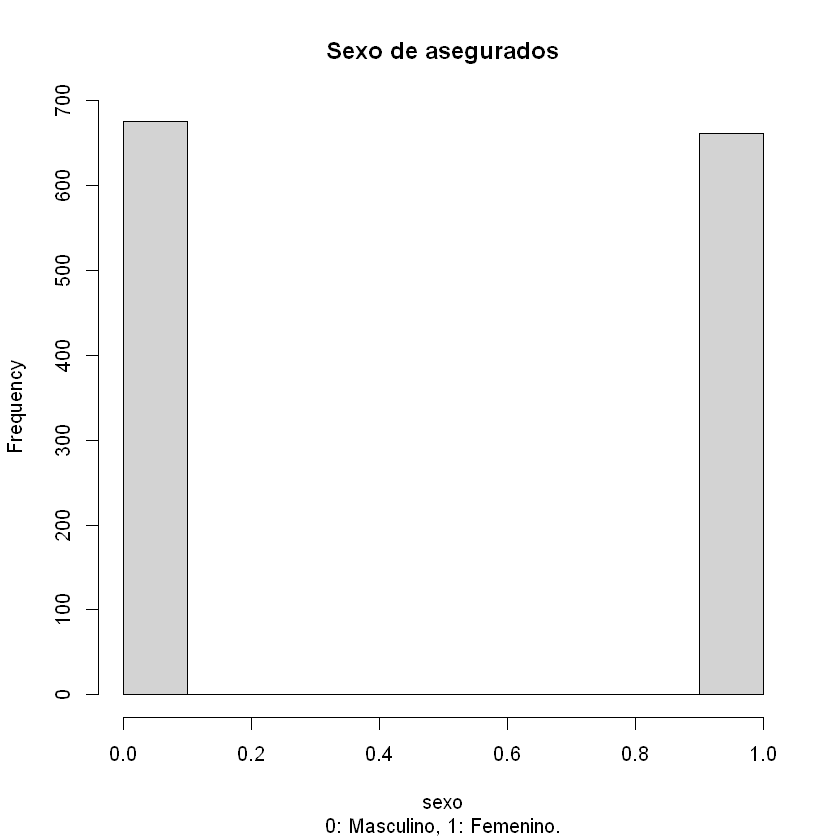

In [7]:
pdf("histSex.pdf")
hist_sex <- hist(InsData$sex, main="Sexo de asegurados",
        xlab="sexo",
        sub= "0: Masculino, 1: Femenino.")
dev.off()
hist_sex <- hist(InsData$sex, main="Sexo de asegurados",
        xlab="sexo",
        sub= "0: Masculino, 1: Femenino.")

png 
  2

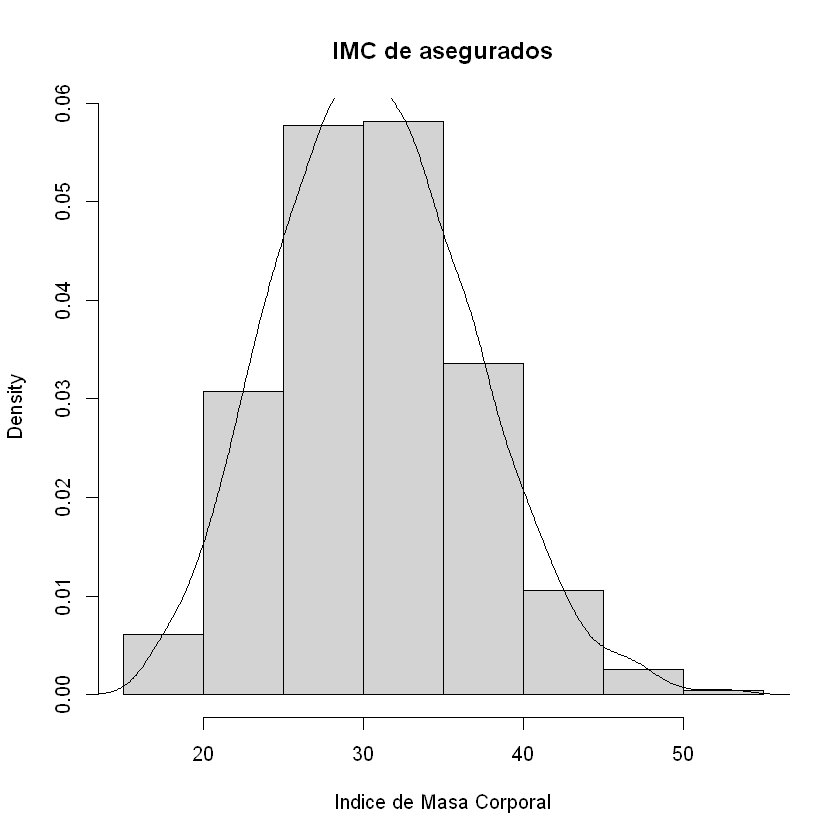

In [8]:
pdf("histbmi.pdf")
hist_bmi <- hist(InsData$bmi, main="IMC de asegurados",
        xlab="Indice de Masa Corporal",
        prob = TRUE)
lines(density(InsData$bmi))
dev.off()
hist_bmi <- hist(InsData$bmi, main="IMC de asegurados",
        xlab="Indice de Masa Corporal",
        prob = TRUE)
lines(density(InsData$bmi))

png 
  2

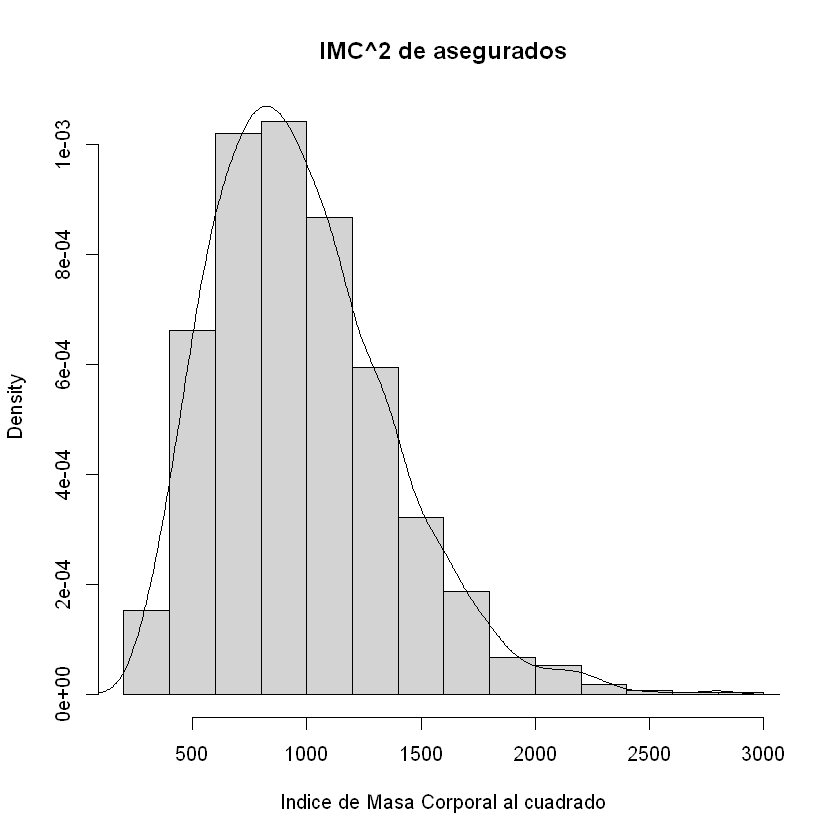

In [9]:
pdf("histbmiSQ.pdf")
hist_bmiSQ <- hist(InsData$bmiSQ, main="IMC^2 de asegurados",
        xlab="Indice de Masa Corporal al cuadrado",
        prob = TRUE)
lines(density(InsData$bmiSQ))
dev.off()
hist_bmiSQ <- hist(InsData$bmiSQ, main="IMC^2 de asegurados",
        xlab="Indice de Masa Corporal al cuadrado",
        prob = TRUE)
lines(density(InsData$bmiSQ))

png 
  2

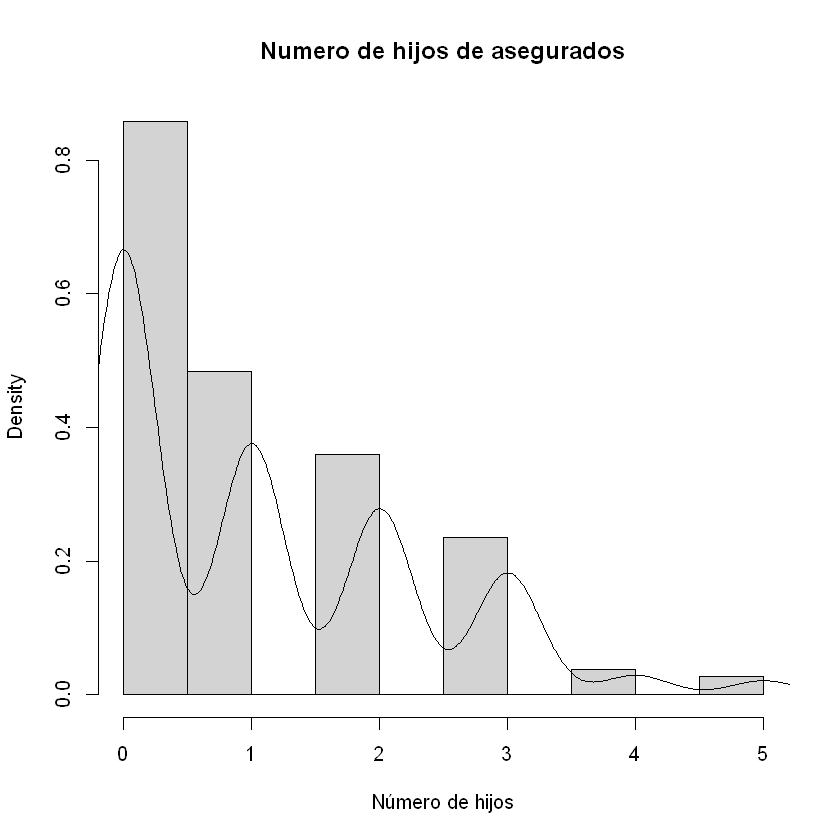

In [10]:
pdf("histChildren.pdf")
hist_children <- hist(InsData$children, main="Numero de hijos de asegurados",
        xlab="Número de hijos",
        prob = TRUE)
lines(density(InsData$children))
dev.off()
hist_children <- hist(InsData$children, main="Numero de hijos de asegurados",
        xlab="Número de hijos",
        prob = TRUE)
lines(density(InsData$children))

png 
  2

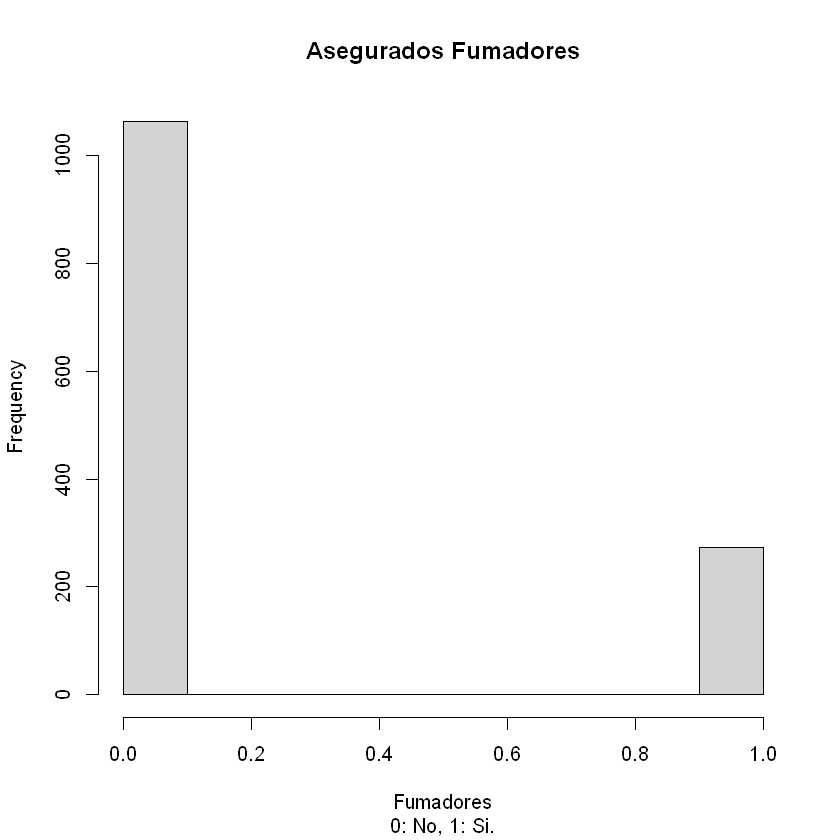

In [11]:
pdf("histSmoker.pdf")
hist_smoker <- hist(InsData$smoker, main="Asegurados Fumadores",
        xlab="Fumadores",
        sub= "0: No, 1: Si.")
dev.off()
hist_smoker <- hist(InsData$smoker, main="Asegurados Fumadores",
        xlab="Fumadores",
        sub= "0: No, 1: Si.")

png 
  2

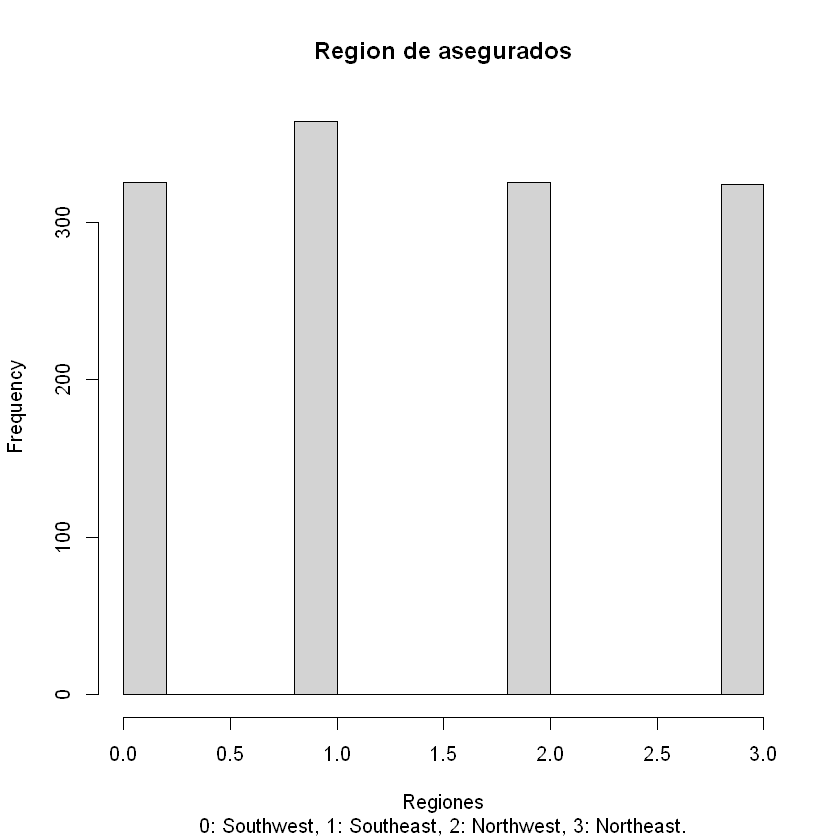

In [12]:
pdf("histRegion.pdf")
hist_region <- hist(InsData$region, main="Region de asegurados",
        xlab="Regiones",
        sub= "0: Southwest, 1: Southeast, 2: Northwest, 3: Northeast.")
dev.off()
hist_region <- hist(InsData$region, main="Region de asegurados",
        xlab="Regiones",
        sub= "0: Southwest, 1: Southeast, 2: Northwest, 3: Northeast.")

### Boxplots

png 
  2

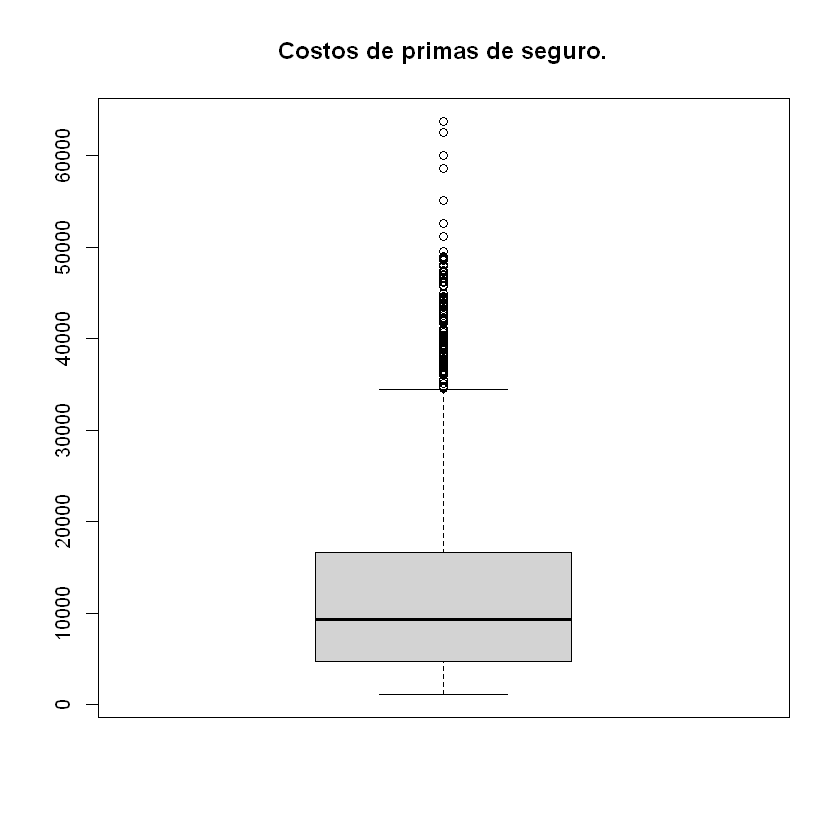

In [13]:
pdf("BoxCharges.pdf")
box_charge <- boxplot(InsData$charges, main="Costos de primas de seguro.")
dev.off()
box_charge <- boxplot(InsData$charges, main="Costos de primas de seguro.")

png 
  2

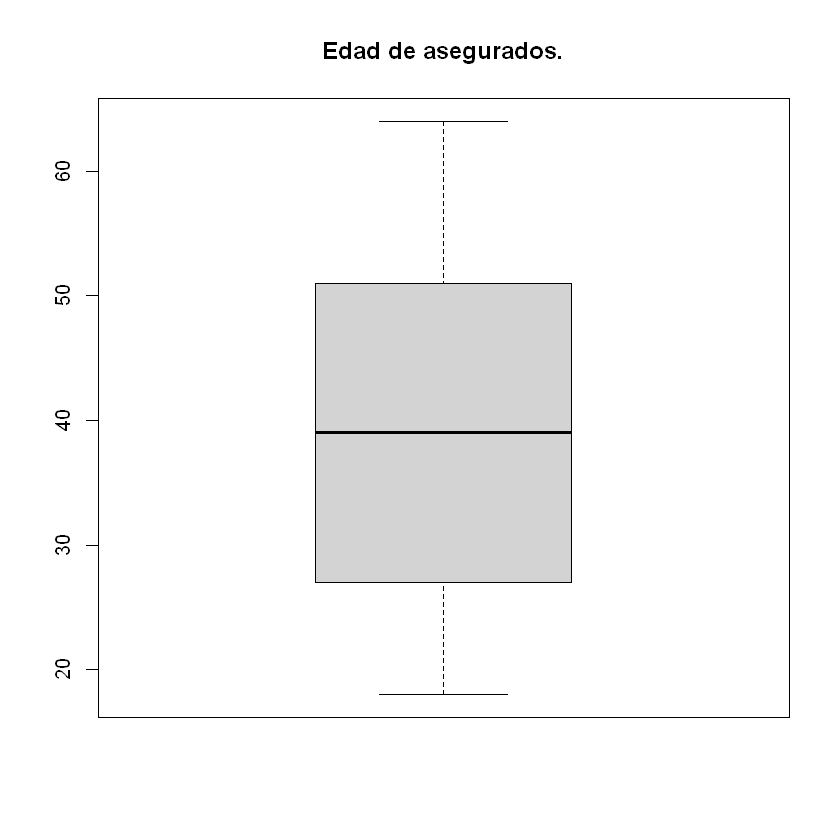

In [14]:
pdf("BoxAge.pdf")
box_age <- boxplot(InsData$age, main="Edad de asegurados.")
dev.off()
box_age <- boxplot(InsData$age, main="Edad de asegurados.")

png 
  2

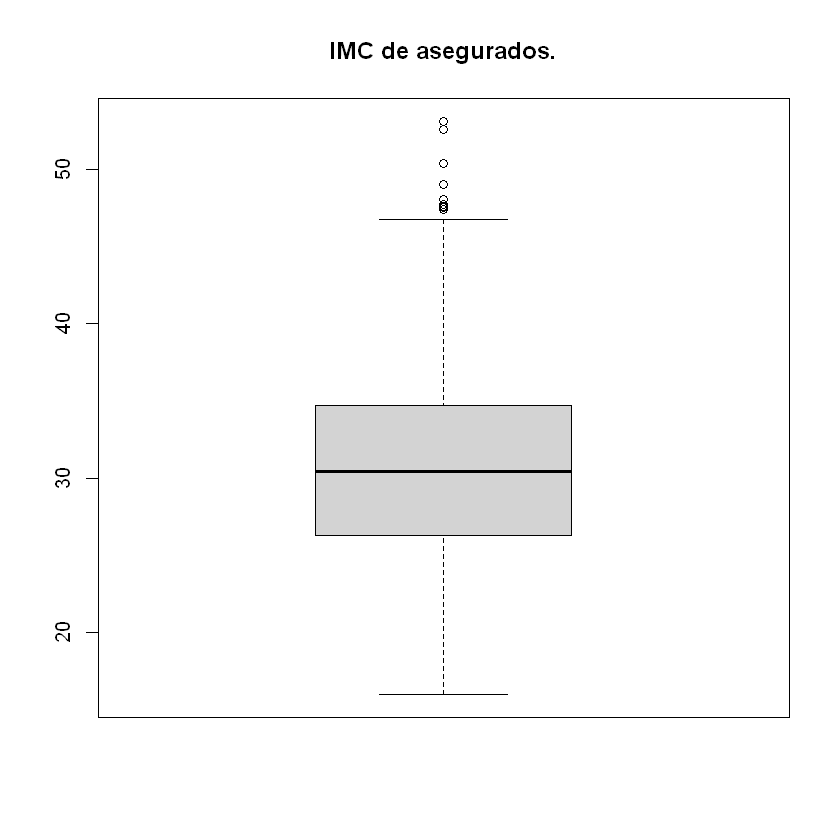

In [15]:
pdf("BoxBmi.pdf")
box_bmi <- boxplot(InsData$bmi, main="IMC de asegurados.")
dev.off()
box_bmi <- boxplot(InsData$bmi, main="IMC de asegurados.")

png 
  2

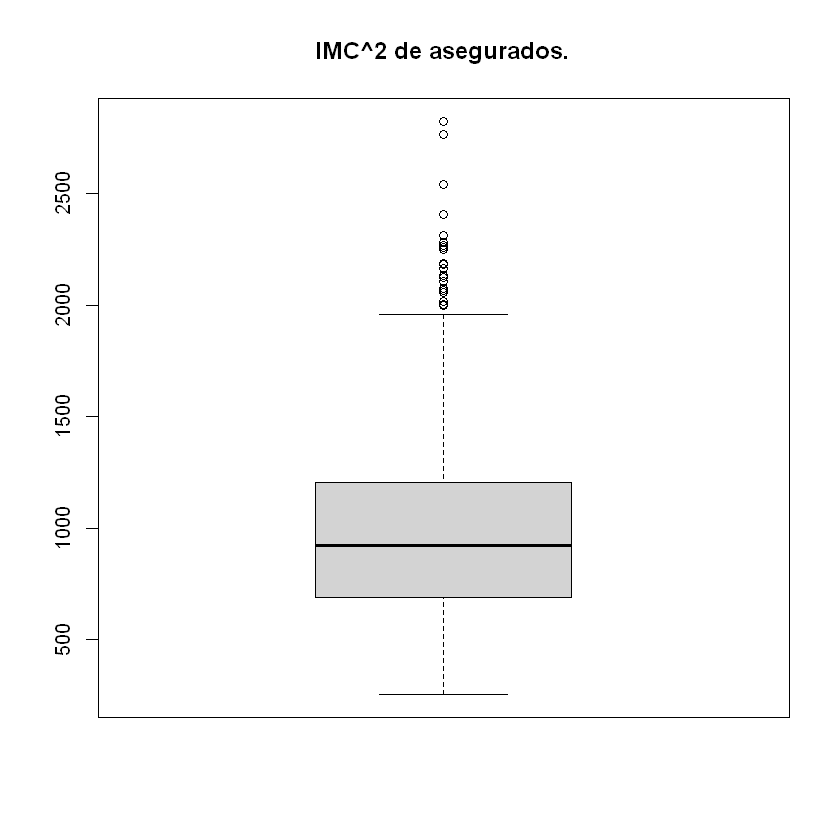

In [16]:
pdf("BoxBmiSQ.pdf")
box_bmiSQ <- boxplot(InsData$bmiSQ, main= "IMC^2 de asegurados.")
dev.off()
box_bmiSQ <- boxplot(InsData$bmiSQ, main= "IMC^2 de asegurados.")

png 
  2

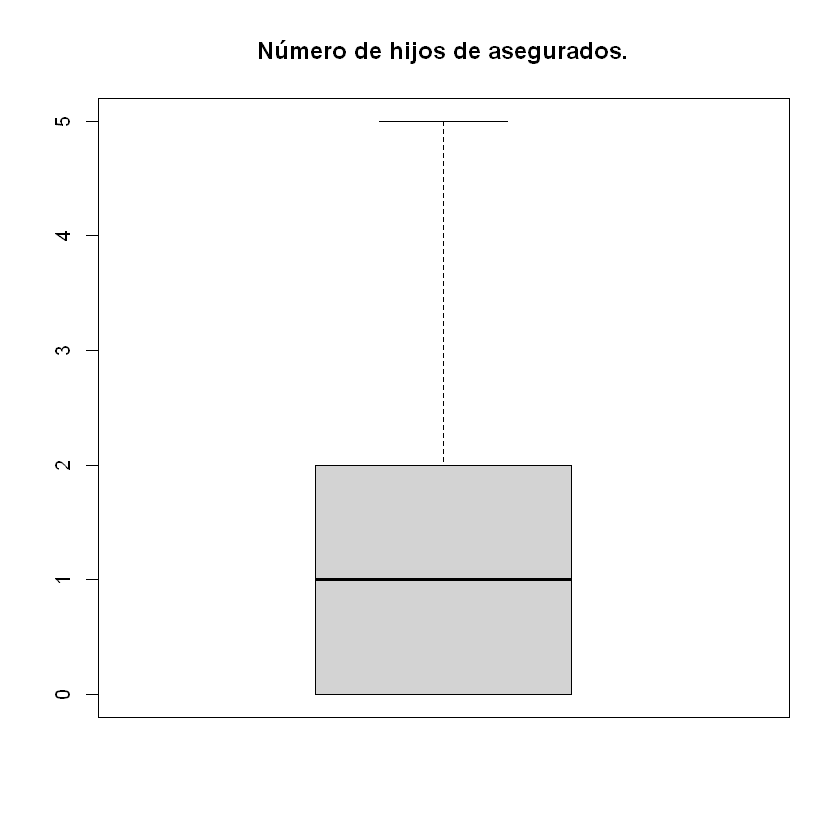

In [17]:
pdf("BoxChildren.pdf")
box_children <- boxplot(InsData$children, main= "Número de hijos de asegurados.")
dev.off()
box_children <- boxplot(InsData$children, main= "Número de hijos de asegurados.")

## Matriz de Scatters

png 
  2

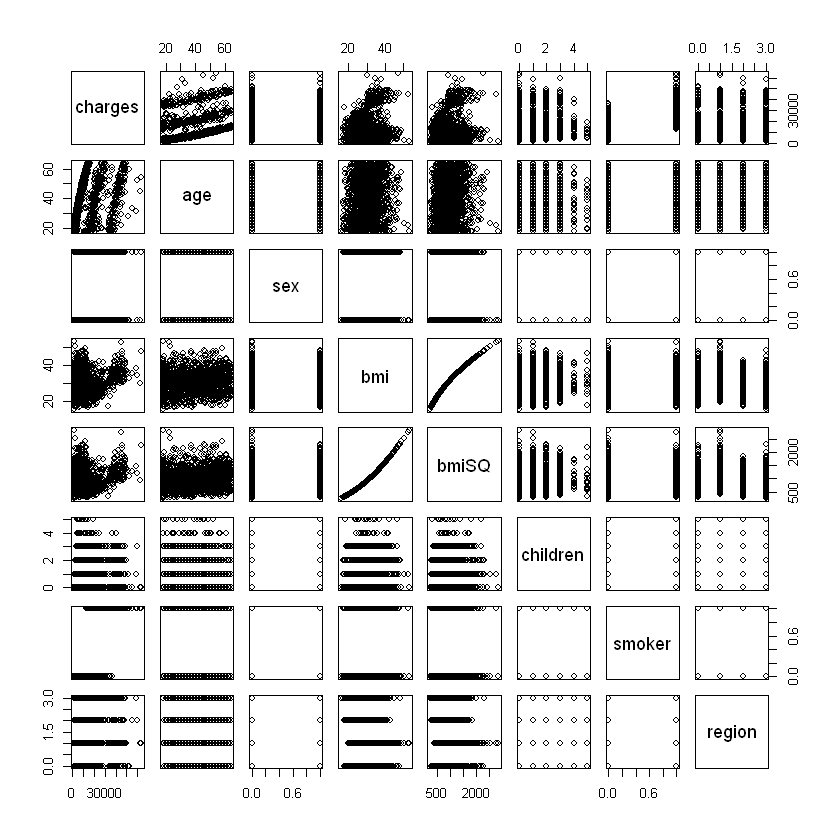

In [18]:
pdf("Pares.pdf")
pairs(InsData)
dev.off()
pairs(InsData)

## Regresiones de Costo para cada variable

In [19]:
regresion_age   <- lm(InsData$charges ~ InsData$age  , data = InsData)
regresion_sex   <- lm(InsData$charges ~ InsData$sex   , data = InsData)
regresion_bmi  <- lm(InsData$charges ~ InsData$bmi  , data = InsData)
regresion_bmiSQ   <- lm(InsData$charges ~ InsData$bmiSQ  , data = InsData)
regresion_children   <- lm(InsData$charges ~ InsData$children  , data = InsData) 
regresion_smoker   <- lm(InsData$charges ~ InsData$smoker  , data = InsData)
regresion_region   <- lm(InsData$charges ~ InsData$region  , data = InsData)

In [20]:
pdf("charge_vs_age.pdf")
plot(InsData$age , InsData$charges, xlab='Edad', ylab='Costo de prima de seguros', main='Costo de prima vs Edad')
abline(regresion_age, col="green")
dev.off()

png 
  2

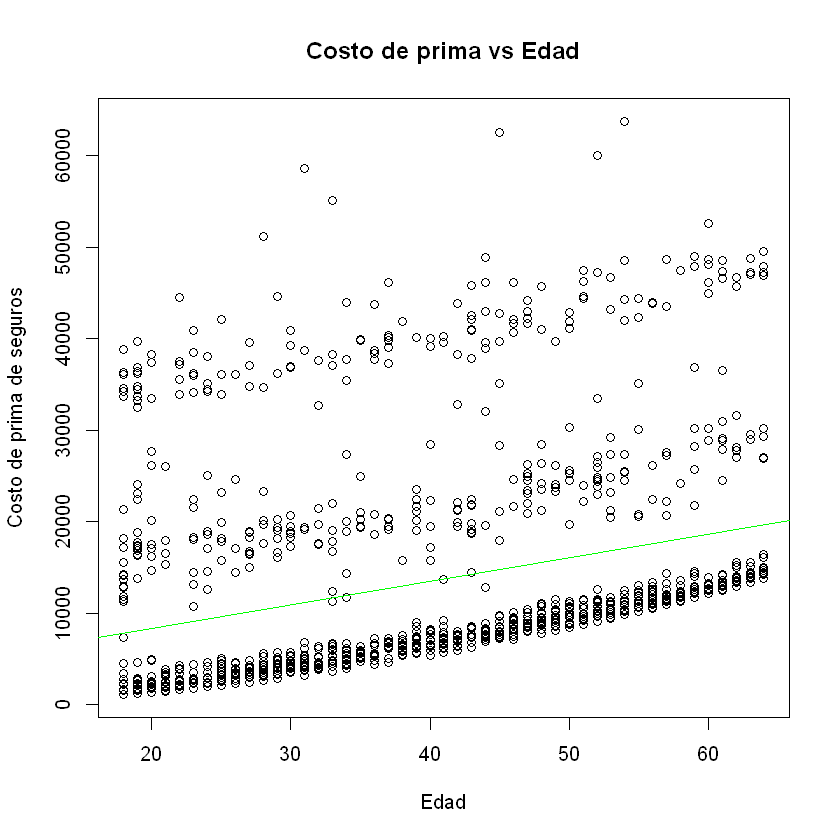

In [21]:
plot(InsData$age , InsData$charges, xlab='Edad', ylab='Costo de prima de seguros', main='Costo de prima vs Edad')
abline(regresion_age, col="green")

In [22]:
pdf("charge_vs_sex.pdf")
plot(InsData$sex , InsData$charges, xlab='Sexo', ylab='Costo de prima de seguros', main='Costo de prima vs Sexo')
abline(regresion_sex, col="green")
dev.off()

png 
  2

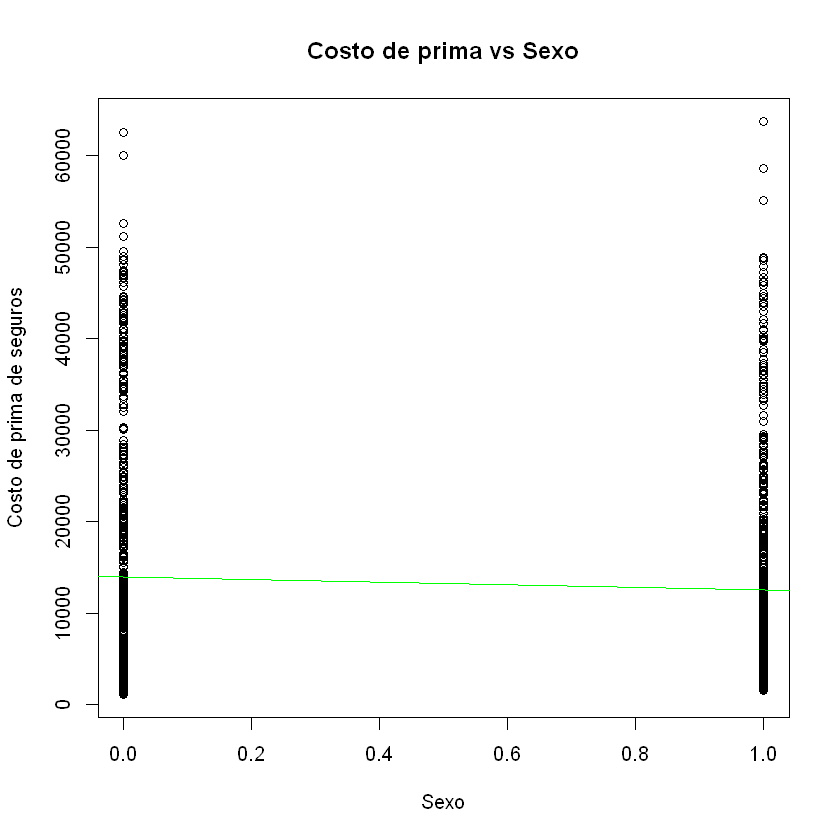

In [23]:
plot(InsData$sex , InsData$charges, xlab='Sexo', ylab='Costo de prima de seguros', main='Costo de prima vs Sexo')
abline(regresion_sex, col="green")

### Ajuste logistico para variable Sexo

In [24]:
sex_logistico <- glm(InsData$sex ~ InsData$charges, data = InsData, family = "binomial")
sex_logistico


Call:  glm(formula = InsData$sex ~ InsData$charges, family = "binomial", 
    data = InsData)

Coefficients:
    (Intercept)  InsData$charges  
      1.052e-01       -9.523e-06  

Degrees of Freedom: 1337 Total (i.e. Null);  1336 Residual
Null Deviance:	    1855 
Residual Deviance: 1850 	AIC: 1854

In [25]:
regresion_sex


Call:
lm(formula = InsData$charges ~ InsData$sex, data = InsData)

Coefficients:
(Intercept)  InsData$sex  
      13957        -1387  


In [26]:
pdf("charge_vs_sex_logistic.pdf")
ggplot(data = InsData, aes(x = charges, y = sex)) +
  geom_point(aes(color = as.factor(charges)), shape = 1) + 
  geom_smooth(method = "glm",
              method.args = list(family = "binomial"),
              color = "gray20",
              se = TRUE) +
  theme_bw() +
  theme(legend.position = "none")
dev.off()

`geom_smooth()` using formula 'y ~ x'



png 
  2

`geom_smooth()` using formula 'y ~ x'



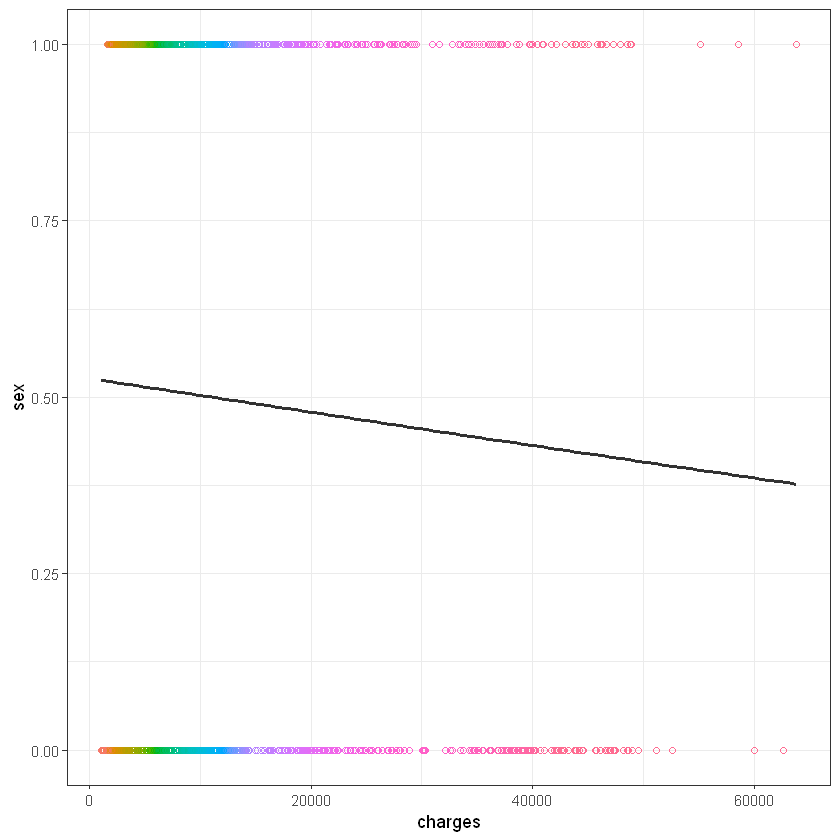

In [27]:
ggplot(data = InsData, aes(x = charges, y = sex)) +
  geom_point(aes(color = as.factor(charges)), shape = 1) + 
  geom_smooth(method = "glm",
              method.args = list(family = "binomial"),
              color = "gray20",
              se = FALSE) +
  theme_bw() +
  theme(legend.position = "none")

In [28]:
pdf("charge_vs_bmi.pdf")
plot(InsData$bmi , InsData$charges, xlab='Indice de masa corporal', ylab='Costo de prima de seguros', main='Costo de prima vs IMC')
abline(regresion_bmi, col="red")
dev.off()

png 
  2

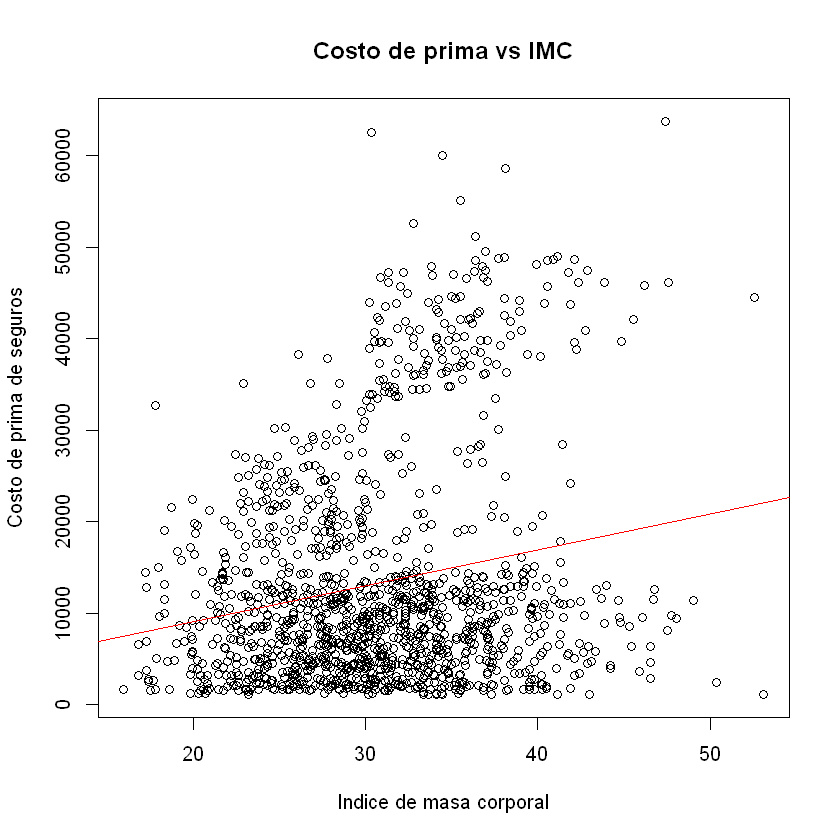

In [29]:
plot(InsData$bmi , InsData$charges, xlab='Indice de masa corporal', ylab='Costo de prima de seguros', main='Costo de prima vs IMC')
abline(regresion_bmi, col="red")

In [30]:
pdf("charge_vs_bmiSQ.pdf")
plot(InsData$bmiSQ , InsData$charges, xlab='Indice de masa corporal al cuadrado', ylab='Costo de prima de seguros', main='Costo de prima vs IMC^2')
abline(regresion_bmiSQ, col="blue")
dev.off()

png 
  2

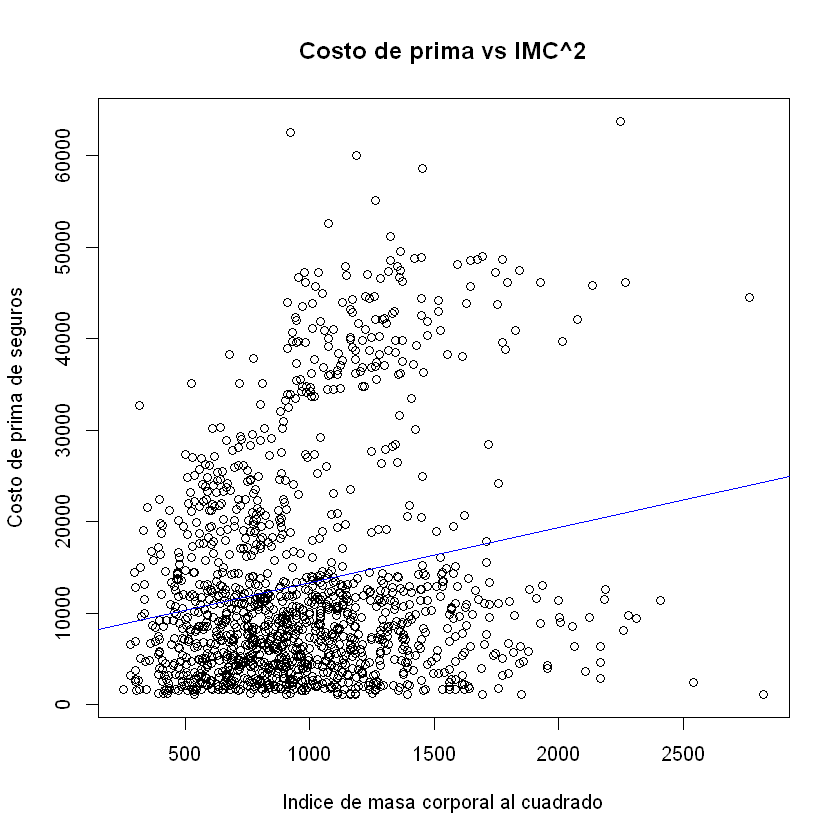

In [31]:
plot(InsData$bmiSQ , InsData$charges, xlab='Indice de masa corporal al cuadrado', ylab='Costo de prima de seguros', main='Costo de prima vs IMC^2')
abline(regresion_bmiSQ, col="blue")

### Comparemos estas ultimas dos regresiones en un mismo grafico reescalado

In [32]:
pdf("comparativa_bmi_bmiSQ.pdf")
plot(InsData$bmi, InsData$charges, xlab='Indice de masa corporal', ylab='Costo de prima de seguros', main='Costo de prima vs IMC')
abline(regresion_bmi, col="blue")

abline(regresion_bmiSQ, col="red")
legend(x="topleft", legend= c("Regresion IMC", "Regresion IMC^2"), fill=c("blue", "red"))
dev.off()

png 
  2

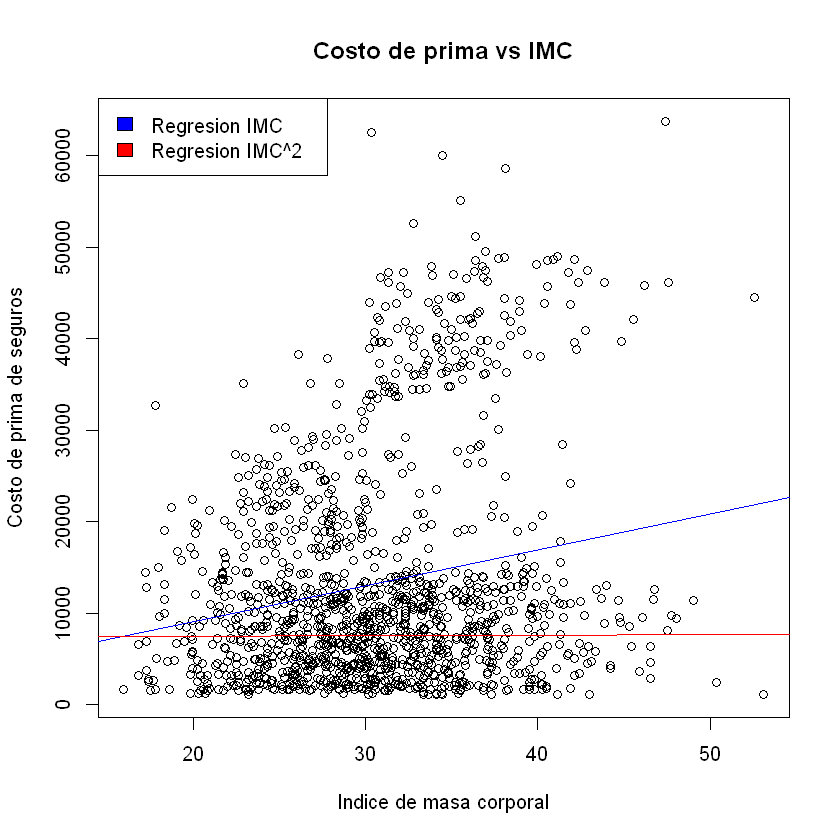

In [33]:
plot(InsData$bmi, InsData$charges, xlab='Indice de masa corporal', ylab='Costo de prima de seguros', main='Costo de prima vs IMC')
abline(regresion_bmi, col="blue")

abline(regresion_bmiSQ, col="red")
legend(x="topleft", legend= c("Regresion IMC", "Regresion IMC^2"), fill=c("blue", "red"))

### Regresion de  Costo vs Numero de hijos

png 
  2

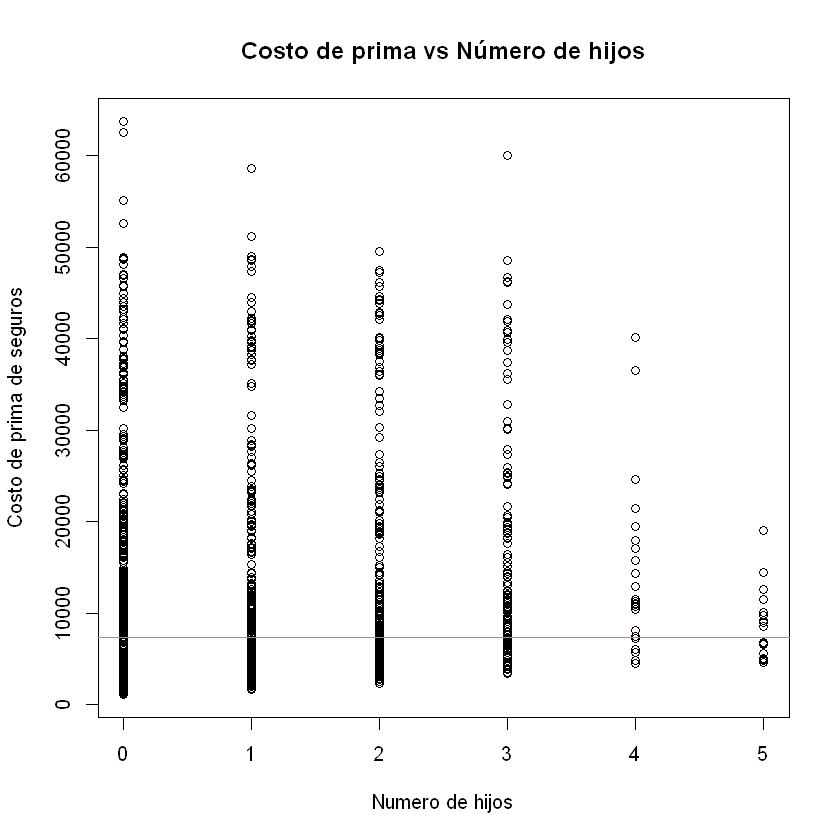

In [34]:
pdf("charge_vs_children.pdf")
plot(InsData$children , InsData$charges, xlab='Numero de hijos', ylab='Costo de prima de seguros', main='Costo de prima vs Número de hijos')
abline(regresion_bmiSQ, col="green")
dev.off()
plot(InsData$children , InsData$charges, xlab='Numero de hijos', ylab='Costo de prima de seguros', main='Costo de prima vs Número de hijos')
abline(regresion_bmiSQ, col="green")

### Regresion lineal y logistica respecto a Smoker

In [35]:
pdf("charge_vs_smoker.pdf")
plot(InsData$smoker , InsData$charges, xlab='Es fumador', ylab='Costo de prima de seguros', main='Costo de prima vs Fumador')
abline(regresion_smoker, col="green")
dev.off()

png 
  2

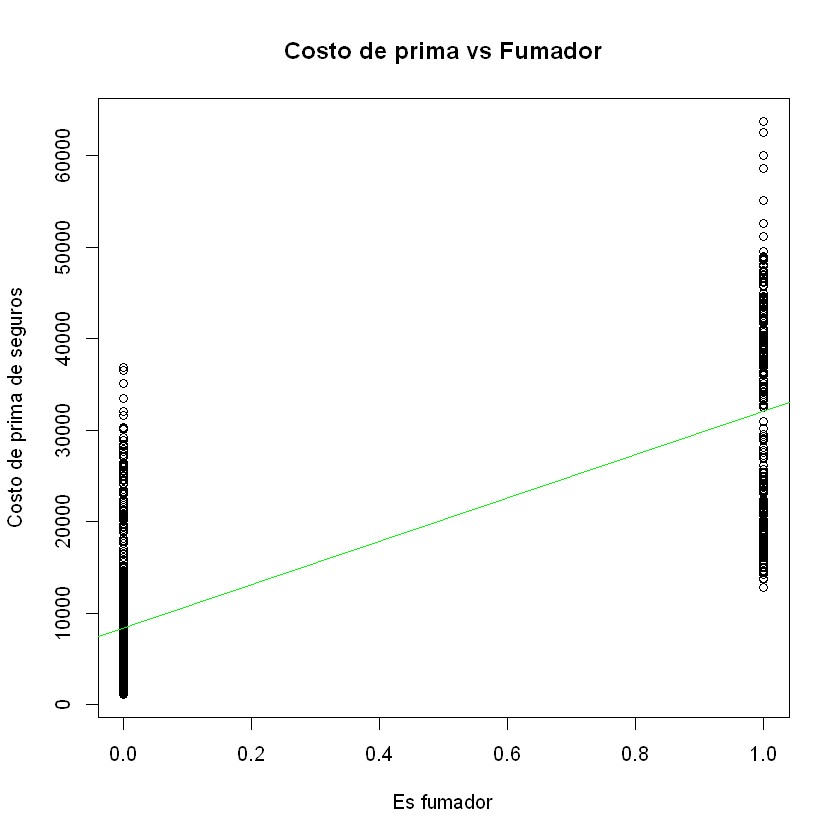

In [36]:
plot(InsData$smoker , InsData$charges, xlab='Es fumador', ylab='Costo de prima de seguros', main='Costo de prima vs Fumador')
abline(regresion_smoker, col="green")

In [37]:
pdf("charges_vs_smoker_logistica")
ggplot(data = InsData, aes(x = charges, y = smoker),main="Costo de Prima-Fumador Logistica") +
  geom_point(aes(color = as.factor(charges)), shape = 1) + 
  geom_smooth(method = "glm",
              method.args = list(family = "binomial"),
              color = "gray20",
              se = TRUE) +
  theme_bw() +
  theme(legend.position = "topright")
dev.off()

`geom_smooth()` using formula 'y ~ x'



png 
  2

`geom_smooth()` using formula 'y ~ x'



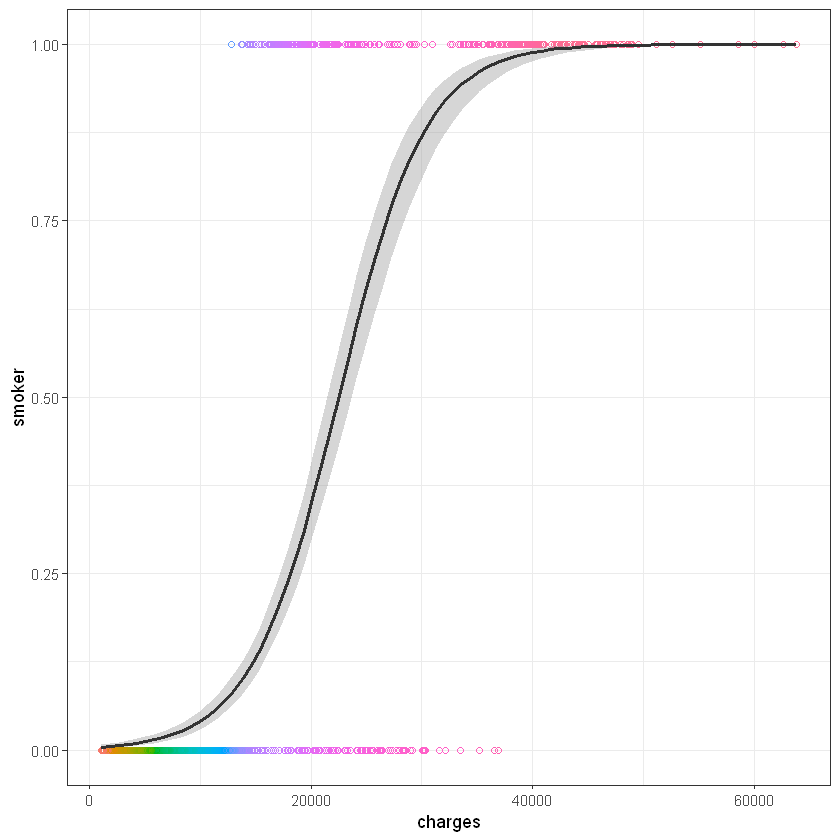

In [38]:
ggplot(data = InsData, aes(x = charges, y = smoker), main="Costo de Prima-Fumador Logistica") +
  geom_point(aes(color = as.factor(charges)), shape = 1) + 
  geom_smooth(method = "glm",
              method.args = list(family = "binomial"),
              color = "gray20",
              se = TRUE) +
  theme_bw() +
  theme(legend.position = "topright")

### Regresion de Costo respecto a Regiones

In [39]:
pdf("charge_vs_region.pdf")
plot(InsData$region , InsData$charges, xlab='Regipon', ylab='Costo de prima de seguros', main='Costo de prima vs Región.')
abline(regresion_region, col="green")
dev.off()

png 
  2

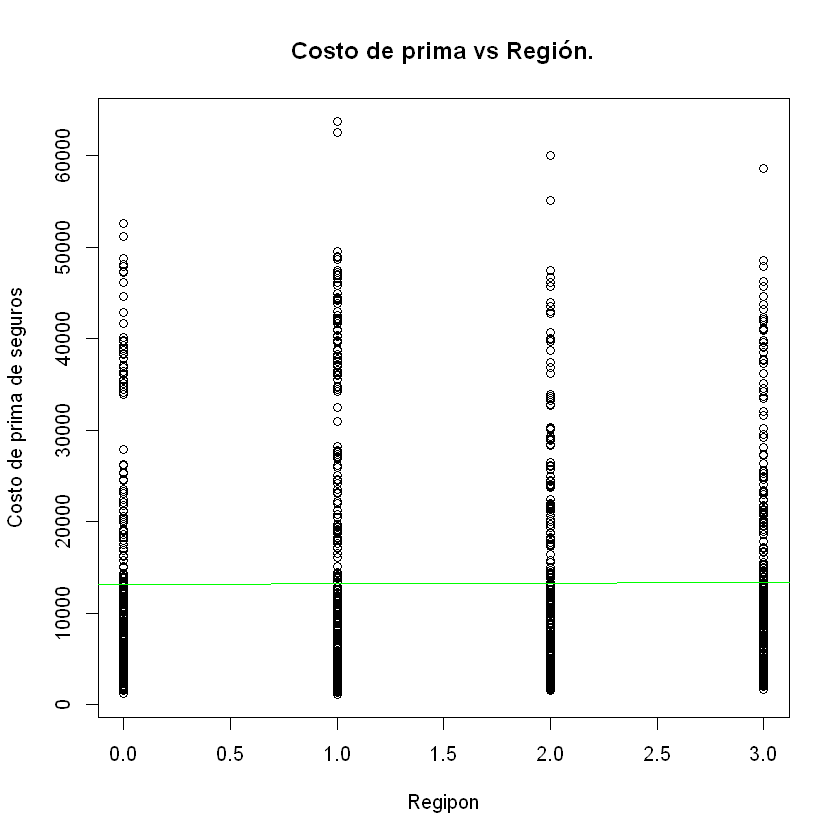

In [40]:
plot(InsData$region , InsData$charges, xlab='Regipon', ylab='Costo de prima de seguros', main='Costo de prima vs Región.')
abline(regresion_region, col="green")

### Veamos los estimadores de correlacion del Costo con las demás variables

In [59]:
a = c()
b = c()
for (i in InsData){       
    pear = cbind(pear, cor.test(InsData$charge, i, method= "pearson"))
    spear= cbind(spear, cor.test(InsData$charge, i, method= "spearman"))
    }

Warning message in cor.test.default(InsData$charge, i, method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(InsData$charge, i, method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(InsData$charge, i, method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(InsData$charge, i, method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(InsData$charge, i, method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(InsData$charge, i, method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(InsData$charge, i, method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(InsData$charge, i, method = "spearman"):
"Cannot compute exact p-value with ties"


In [60]:
print(pear)

            [,1]                                  
statistic   0.2269236                             
parameter   1336                                  
p.value     0.8205178                             
estimate    0.006208235                           
null.value  0                                     
alternative "two.sided"                           
method      "Pearson's product-moment correlation"
data.name   "InsData$charge and i"                
conf.int    numeric,2                             
            [,2]                                  
statistic   Inf                                   
parameter   1336                                  
p.value     0                                     
estimate    1                                     
null.value  0                                     
alternative "two.sided"                           
method      "Pearson's product-moment correlation"
data.name   "InsData$charge and i"                
conf.int    numeric,2          

In [61]:
print(spear)

            [,1]                              [,2]                             
statistic   381845712                         8.864558e-08                     
parameter   NULL                              NULL                             
p.value     0.1114838                         0                                
estimate    0.04353062                        1                                
null.value  0                                 0                                
alternative "two.sided"                       "two.sided"                      
method      "Spearman's rank correlation rho" "Spearman's rank correlation rho"
data.name   "InsData$charge and i"            "InsData$charge and i"           
            [,3]                              [,4]                             
statistic   185881923                         403012709                        
parameter   NULL                              NULL                             
p.value     1.130692e-99                

In [66]:
model_lin_lin <- lm(charges ~ age + sex + bmi + bmiSQ + children + smoker + region, data=InsData)

In [67]:
model_log_lin <- lm(log(charges) ~ age + sex + bmi + bmiSQ + children + smoker + region, data= InsData)

In [70]:
model_log_log <- lm(log(charges) ~ log(age) + sex + log(bmi) + log(bmiSQ) + children + smoker + region, data= InsData)

In [71]:
res1 <- ols_step_all_possible(model_lin_lin) #este lo aprendí de mi buen amigo Richi.
res2 <- ols_step_all_possible(model_log_lin)
res3 <- ols_step_all_possible(model_log_log)

Warning message in b * sx:
"longitud de objeto mayor no es múltiplo de la longitud de uno menor"
Warning message in b * sx:
"longitud de objeto mayor no es múltiplo de la longitud de uno menor"
Warning message in b * sx:
"longitud de objeto mayor no es múltiplo de la longitud de uno menor"
Warning message in b * sx:
"longitud de objeto mayor no es múltiplo de la longitud de uno menor"
Warning message in b * sx:
"longitud de objeto mayor no es múltiplo de la longitud de uno menor"
Warning message in b * sx:
"longitud de objeto mayor no es múltiplo de la longitud de uno menor"
Warning message in b * sx:
"longitud de objeto mayor no es múltiplo de la longitud de uno menor"
Warning message in b * sx:
"longitud de objeto mayor no es múltiplo de la longitud de uno menor"
Warning message in b * sx:
"longitud de objeto mayor no es múltiplo de la longitud de uno menor"
Warning message in b * sx:
"longitud de objeto mayor no es múltiplo de la longitud de uno menor"
Warning message in b * sx:
"lo

### RES corresponde a las combinaciones de variables explicativas y sus resultantes indicadores de bondad de ajuste para el MRL

In [72]:
model_lin_lin


Call:
lm(formula = charges ~ age + sex + bmi + bmiSQ + children + smoker + 
    region, data = InsData)

Coefficients:
(Intercept)          age          sex          bmi        bmiSQ     children  
  -20139.71       255.70       132.45       805.43        -7.49       479.74  
     smoker       region  
   23843.05       360.22  


In [73]:
model_log_lin


Call:
lm(formula = log(charges) ~ age + sex + bmi + bmiSQ + children + 
    smoker + region, data = InsData)

Coefficients:
(Intercept)          age          sex          bmi        bmiSQ     children  
  6.1720408    0.0345101    0.0754639    0.0556297   -0.0006866    0.1024286  
     smoker       region  
  1.5519119    0.0482098  


In [74]:
model_log_log


Call:
lm(formula = log(charges) ~ log(age) + sex + log(bmi) + log(bmiSQ) + 
    children + smoker + region, data = InsData)

Coefficients:
(Intercept)     log(age)          sex     log(bmi)   log(bmiSQ)     children  
    2.70924      1.24797      0.07517      0.40631           NA      0.08283  
     smoker       region  
    1.54801      0.04894  


In [64]:
head(res1)

,mindex,n,predictors,rsquare,adjr,predrsq,cp,aic,sbic,sbc,msep,fpe,apc,hsp
,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6,1,1,smoker,0.619764815,0.619480208,0.6180369630,702.852,27667.46,23868.78,27683.06,74665926332,55887544,0.3813736,41800.85
1,2,1,age,0.089405900,0.088724317,0.0866794766,3543.890,28835.95,25034.91,28851.55,178811311166,133840503,0.9133204,100105.42
3,3,1,bmi,0.039339140,0.038620082,0.0362113860,3812.089,28907.56,25106.43,28923.16,188642807938,141199391,0.9635371,105609.47
4,4,1,bmiSQ,0.037241518,0.036520890,0.0338627746,3823.325,28910.48,25109.34,28926.08,189054713255,141507702,0.9656410,105840.07
5,5,1,children,0.004623759,0.003878717,0.0017935950,3998.053,28955.06,25153.86,28970.66,195459789076,146301910,0.9983564,109425.88
2,6,1,sex,0.003282380,0.002536334,0.0003007149,4005.238,28956.86,25155.66,28972.46,195723192541,146499068,0.9997018,109573.34


In [65]:
head(res2)

,mindex,n,predictors,rsquare,adjr,predrsq,cp,aic,sbic,sbc,msep,fpe,apc,hsp
,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6,1,1,smoker,0.442897847,0.442480855,0.441651281,1865.609,2794.835,-1005.2486,2810.432,630.7322,0.4721039,0.5587701,0.0003531080
1,2,1,age,0.278608783,0.278068820,0.276270005,2809.171,3140.619,-660.0860,3156.215,816.7347,0.6113270,0.7235511,0.0004572394
5,3,1,children,0.026029415,0.025300395,0.023310487,4259.812,3542.285,-258.9949,3557.882,1102.6965,0.8253698,0.9768867,0.0006173317
3,4,1,bmi,0.017601167,0.016865839,0.014507451,4308.218,3553.814,-247.4808,3569.411,1112.2386,0.8325121,0.9853401,0.0006226738
4,5,1,bmiSQ,0.015605824,0.014869002,0.012389476,4319.678,3556.529,-244.7694,3572.126,1114.4977,0.8342030,0.9873415,0.0006239385
7,6,1,region,0.001822395,0.001075256,-0.001059661,4398.840,3575.134,-226.1878,3590.730,1130.1028,0.8458835,1.0011662,0.0006326749


In [75]:
head(res3)

,mindex,n,predictors,rsquare,adjr,predrsq,cp,aic,sbic,sbc,msep,fpe,apc,hsp
,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6,1,1,smoker,0.442897847,0.442480855,0.441651281,1863.373,2794.835,NA,2810.432,630.7322,0.4721039,0.5587701,0.0003531080
1,2,1,log(age),0.286290848,0.285756635,0.283778431,2762.187,3126.294,NA,3141.891,808.0373,0.6048170,0.7158460,0.0004523702
5,3,1,children,0.026029415,0.025300395,0.023310487,4255.904,3542.285,NA,3557.882,1102.6965,0.8253698,0.9768867,0.0006173317
3,4,1,log(bmi),0.019023047,0.018288783,0.016014915,4296.116,3551.876,NA,3567.473,1110.6288,0.8313072,0.9839140,0.0006217726
4,5,1,log(bmiSQ),0.019023047,0.018288783,0.016014915,4296.116,3551.876,NA,3567.473,1110.6288,0.8313072,0.9839140,0.0006217726
7,6,1,region,0.001822395,0.001075256,-0.001059661,4394.835,3575.134,NA,3590.730,1130.1028,0.8458835,1.0011662,0.0006326749
